Digital Image Processing

Student: Anderson Rafhael; 18113000

Processamento de Imagens Coloridas

In [23]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import cv2 as cv

In [24]:
# General Functions

def normalize(min, max, zz):
  return ((max-min) * ((zz - np.min(zz)) / (np.max(zz) - np.min(zz)))).astype(int) + min


def plotImage(img):
    
    plt.figure()
    plt.subplots(figsize=(10, 7))
    
    plt.subplot(121)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)) 
    plt.title('Original Image')
    plt.xticks([]), plt.yticks([])
    
    
def show2Images(original, result, tittle):
    
    plt.figure()
    plt.subplots(figsize=(10, 7))
    
    plt.subplot(121)
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB)) 
    plt.title('Original Image')
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(122) 
    plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
    plt.title(tittle)
    plt.xticks([]), plt.yticks([])
  


def showImages(original, mask, maskedImage, bgImage):
    
    plt.figure()
    plt.subplots(figsize=(10, 7))
    
    plt.subplot(141)
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB)) 
    plt.title('Original Image')
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(142) 
    plt.imshow(mask, cmap='gray')
    plt.title("Mask")
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(143) 
    plt.imshow(maskedImage)
    plt.title("Masked Image")
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(144)
    plt.imshow(cv.cvtColor(bgImage, cv.COLOR_BGR2RGB)) 
    plt.title('Background Image')
    plt.xticks([]), plt.yticks([])
    
    plt.show()

1. Selecionar uma imagem da Internet de algum filme que possua um fundo uniforme (azul ou verde, por ex.) e aplicar a técnica de _chroma-keying_.

Image type:  <class 'numpy.ndarray'> Image Dimensions :  (1080, 1920, 3)

Image type:  <class 'numpy.ndarray'> Image Dimensions :  (2448, 3264, 3)


<Figure size 640x480 with 0 Axes>

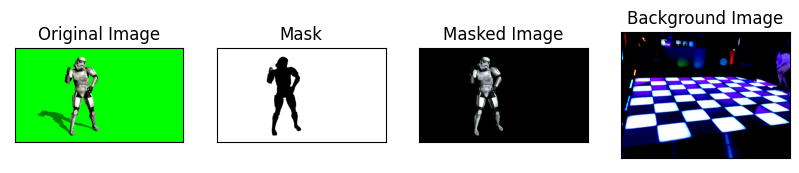

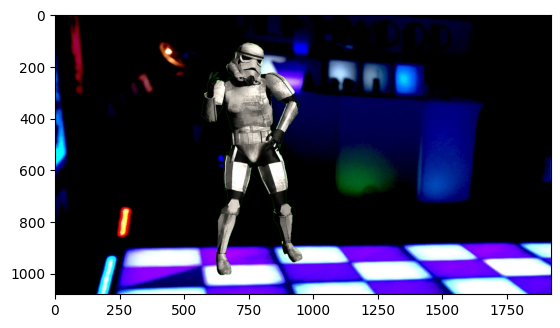

In [25]:
img = cv.imread('img/starWarsGreen.jpg')
bgImage = cv.imread('img/danceFloor2.webp')

print('Image type: ', type(img),
      'Image Dimensions : ', img.shape)

print('\nImage type: ', type(bgImage),
      'Image Dimensions : ', bgImage.shape)

lower_green = np.array([0, 100, 0])    
upper_green = np.array([100, 255, 100]) 

mask = cv.inRange(img, lower_green, upper_green)
notMask = cv.bitwise_not(mask)

cropBackground = bgImage[:img.shape[0], :img.shape[1]]

notMaskedImage = cv.bitwise_and(img, img, mask=notMask)
maskedBgImage = cv.bitwise_and(cropBackground, cropBackground, mask=mask)

dst = maskedBgImage + notMaskedImage

showImages(img, mask, notMaskedImage, bgImage)
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

#plotImage(img)

2. Carregar uma imagem RGB e aplicar um filtro de borramento.

<Figure size 640x480 with 0 Axes>

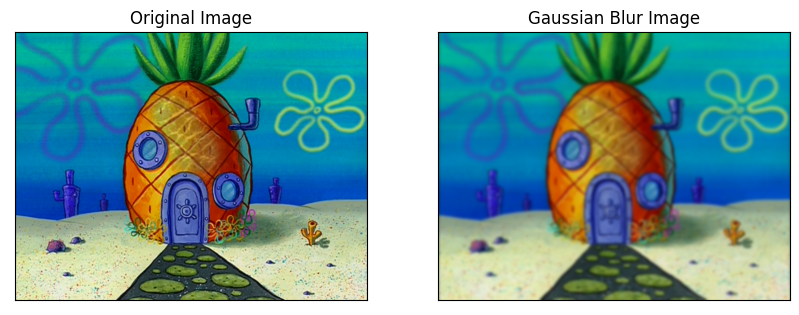

In [37]:
img = cv.imread('img/spongebob.png')
dst = cv.GaussianBlur(img, (41, 41), cv.BORDER_DEFAULT)

show2Images(img, dst, "Gaussian Blur Image")

3. Carregar uma imagem RGB e aplicar um filtro de realçe de bordas.

<Figure size 640x480 with 0 Axes>

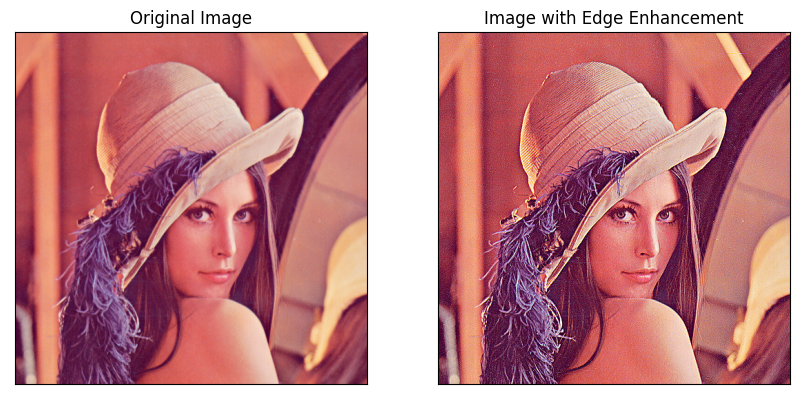

In [54]:
img = cv.imread('img/lena.png')

laplaceKernel = np.array([[0, -1, 0], 
                          [-1, 5, -1], 
                          [0, -1, 0]])

dst = cv.filter2D(img, -1, laplaceKernel)

show2Images(img, dst, "Image with Edge Enhancement")

4. Segmentar cada um dos 5 elementos distintos da imagem 'chips.png' do diretório da disciplina.

In [ ]:
img = cv.imread('chips.png')

img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

imgH = img[:, :, 0]
imgS = img[:, :, 1]
imgV = img[:, :, 2]

# criando uma máscara para os pixels com saturação maior que 175, se maior que 175 = 255
_, mask1 = cv.threshold(imgS, 175,255,cv.THRESH_BINARY)

# criando uma máscara para os pixels com hue entre 65 e 95(verde), 100 e 130(azul), 165 e 180(vermelho), 25 e 35(amarelo), 5 e 20(laranja)

greenH = [65, 95]
blueH = [100, 130]
redH = [165, 180]
yellowH = [25, 35]
orangeH = [5, 20]

greenMask = cv.inRange(imgH, greenH[0], greenH[1]) # verde
blueMask = cv.inRange(imgH, blueH[0], blueH[1]) # azul
redMask = cv.inRange(imgH, redH[0], redH[1]) # vermelho
yellowMask = cv.inRange(imgH, yellowH[0], yellowH[1]) # amarelo
orangeMask = cv.inRange(imgH, orangeH[0], orangeH[1]) # laranja

# criando a máscara resultante
greenMaskResult = cv.bitwise_and(mask1, greenMask)
blueMaskResult = cv.bitwise_and(mask1, blueMask)
redMaskResult = cv.bitwise_and(mask1, redMask)
yellowMaskResult = cv.bitwise_and(mask1, yellowMask)
orangeMaskResult = cv.bitwise_and(mask1, orangeMask)

print("\nImagem das máscaras: \n")

titles = ["mask with saturation greater than 175", "green mask", "blue mask", "red mask", "yellow mask", "orange mask"]
plot6GrayImages(mask1, greenMaskResult, blueMaskResult, redMaskResult, yellowMaskResult, orangeMaskResult, titles)

# aplicando as máscaras e convertendo para BGR
chipsImg = np.array([cv.cvtColor(cv.bitwise_and(img, img, mask=greenMaskResult), cv.COLOR_HSV2BGR),
                    cv.cvtColor(cv.bitwise_and(img, img, mask=blueMaskResult), cv.COLOR_HSV2BGR),
                    cv.cvtColor(cv.bitwise_and(img, img, mask=redMaskResult), cv.COLOR_HSV2BGR),
                    cv.cvtColor(cv.bitwise_and(img, img, mask=yellowMaskResult), cv.COLOR_HSV2BGR),
                    cv.cvtColor(cv.bitwise_and(img, img, mask=orangeMaskResult), cv.COLOR_HSV2BGR)
])

print("\nImagem dos segmentos de cada elemento distinto: \n")

titles = ["green chips", "blue chips", "red chips", "yellow chips", "orange chips"]

plot5Images(chipsImg[0], chipsImg[1], chipsImg[2], chipsImg[3], chipsImg[4], titles)